<a href="https://colab.research.google.com/github/nada912/Neural-Networks/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Activate Tensorflow

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


2. Import tensorflow, keras, numpy and matplot

In [2]:
from __future__ import absolute_import , division , print_function , unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

3. Check Tensorflow version

In [3]:
print(tf.__version__)

2.13.0


4. Import the cifra10 data set

In [4]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170498071/170498071 [==============================] - 2s 0us/step


5. Check datatype

In [5]:
type(cifar10_data)

tuple

In [6]:
len(cifar10_data)

2

6. Load train and test images and labels

In [7]:
(train_images , train_labels),(test_images , test_labels) = cifar10_data

 7. Check that the images are 32 × 32 NumPy arrays, with pixel values ranging from 0 to 255

In [8]:
sample_img = train_images[0]
pixel_min = np.min(sample_img)
pixel_max = np.max(sample_img)

print("Image Shape: ", sample_img.shape)
print(sample_img)
print("Pixel Value Range - Min:", pixel_min, "Max:", pixel_max)

Image Shape:  (32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
Pixel Value Range - Min: 0 Max: 255


Check that the labels are an array of integers, ranging from 0 to 9

In [9]:
min_label = np.min(train_labels)
max_label = np.max(train_labels)

print("Labels type: ", train_labels.dtype)
# another way to check labels type
'''is_integer = np.issubdtype(train_labels.dtype, np.integer)
print("Is Integer Labels:", is_integer)'''
print("Labels Range - Min:", min_label, "Max:", max_label)

Labels type:  uint8
Labels Range - Min: 0 Max: 9


Store the class names in the dataset

In [10]:
class_names = [ 'airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

8. Explore the datasets :  number of train and test points, their array size etc.

In [11]:
print("Number of training samples : ", len(train_images))
print("Number of test samples : ", len(test_images))
print("Number of classes : ", len(set(train_labels.flatten())))

Number of training samples :  50000
Number of test samples :  10000
Number of classes :  10


9. Plot images

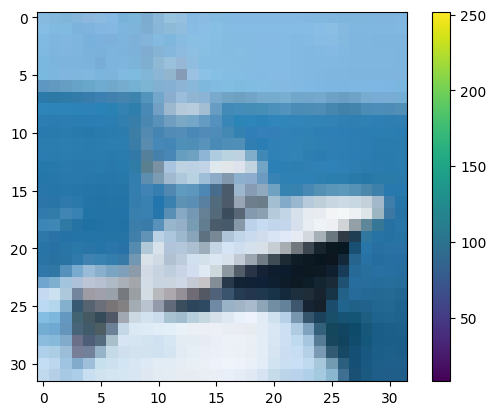

array([8], dtype=uint8)

In [12]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[index]

10. Verify that the data is in the correct format

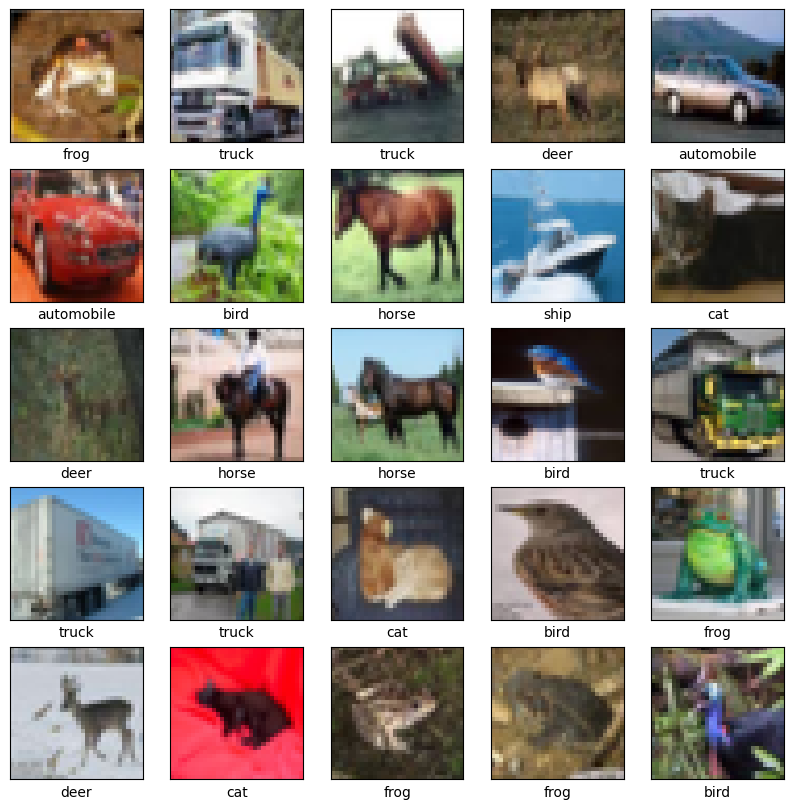

In [13]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1) # Create a 5x5 grid of subplots)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]]) # Display the class name below each image

11. Normalize the pixel values in the training and test sets


In [14]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

12. First neural network definition with three layers and two activation functions

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'), #128 neurons each connected to every neuron in the flatten layer. Rectified Linear Unit fct introduces non-linearity to the model
    keras.layers.Dense(10, activation='softmax')]) # The output layer with 10 neurons. The softmax activation fct converts the model's raw output into class probabilities

13. Compile model

In [16]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

14. Train the model

In [18]:
model.fit(train_images_normalized, train_labels, epochs=10)  # epochs is the nb of times the model learns from the complete training dataset

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3027 - accuracy: 0.0981
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2876 - accuracy: 0.1094
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 2.1369 - accuracy: 0.1782
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0921 - accuracy: 0.1802
Epoch 8/10
1563/1563 [==============================] - 13s 9ms/step - loss: 2.0772 - accuracy: 0.1833
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0708 - accuracy: 0.1812
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step

15. Evaluate the model on the test set

In [19]:
test_loss , test_accuracy = model.evaluate(test_images_normalized , test_labels , verbose = 2)

313/313 - 1s - loss: 2.0623 - accuracy: 0.1866 - 867ms/epoch - 3ms/step


16. Predict labels for each image

In [20]:
predictions = model.predict(test_images_normalized)

313/313 [==============================] - 1s 2ms/step


Get the predicted labels for the first three images


In [21]:
predicted_labels = np.argmax(predictions[:3], axis=1)

# Get the true labels for the first three images
true_labels = test_labels[:3].flatten()

# Compare the predicted labels with the true labels
correct_predictions = np.sum(predicted_labels == true_labels)

print(f"Predicted labels: {predicted_labels}")
print(f"True labels: {true_labels}")
print(f"Number of correct predictions: {correct_predictions}")

Predicted labels: [3 8 8]
True labels: [3 8 8]
Number of correct predictions: 3


17. Function to check the predicted labels


In [33]:
def display_images_with_labels(images, true_labels, predicted_labels, class_names, probabilities):
    plt.figure(figsize=(15, 5))

    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)

        # Display the image
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])

        # Set label color based on correctness
        if true_labels[i] == predicted_labels[i]:
            label_color = 'blue'
        else:
            label_color = 'red'

        # Display the label with probability and percentage in blue or red
        predicted_class = class_names[predicted_labels[i]]
        true_class = class_names[true_labels[i]]
        confidence_percentage = round(probabilities[i][predicted_labels[i]] * 100)
        label_text = f"Predicted: {predicted_class} ({confidence_percentage}%) \nTrue: {true_class}"
        plt.xlabel(label_text, color=label_color)

    plt.show()

Test function

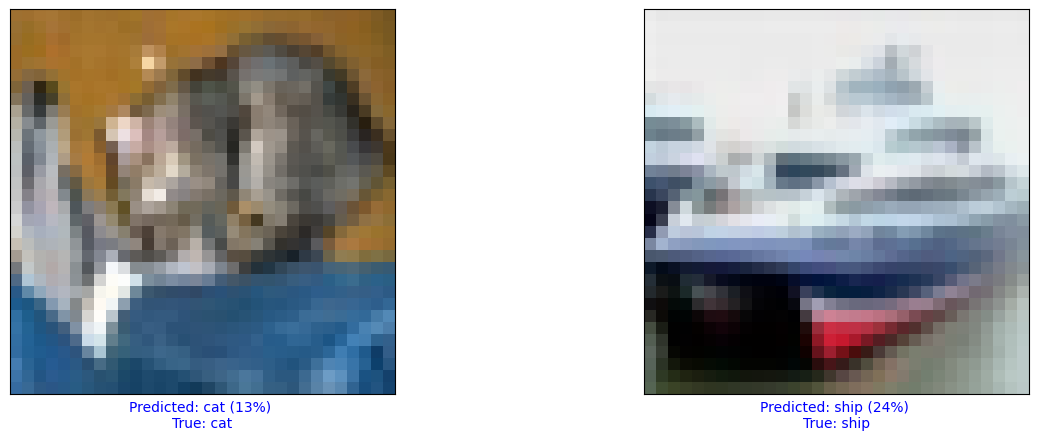

In [41]:
display_images_with_labels(test_images_normalized[:2], test_labels[:2].flatten(), predicted_labels[:2], class_names, predictions[:2])

18. Predict a single image from the test set

In [45]:
single_image = test_images_normalized[5]

# Add a batch dimension using np.expand_dims to not encounter shape mismatch error
single_image_with_batch = np.expand_dims(single_image, axis=0)

# Make a prediction on the single image
prediction = model.predict(single_image_with_batch)

# We can use prediction to access the probabilities for each class
print(prediction)

1/1 [==============================] - 0s 24ms/step
[[0.02391165 0.01253523 0.15183918 0.13784349 0.17641306 0.15637724
  0.18870142 0.13970235 0.00449574 0.00818064]]


19. Change the model structure

Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout with a 50% probability to reduce overfitting
    Dense(10, activation='softmax')
])

Compile model

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train model

In [17]:
model.fit(train_images_normalized, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 45ms/step - loss: 1.6425 - accuracy: 0.4017
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.3092 - accuracy: 0.5319
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1773 - accuracy: 0.5827
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0977 - accuracy: 0.6119
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0362 - accuracy: 0.6364
Epoch 6/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9845 - accuracy: 0.6562
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9452 - accuracy: 0.6686
Epoch 8/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9018 - accuracy: 0.6833
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8672 - accuracy: 0.6938
Epoch 10/10
1563/1563 [==============================] - 70s 45m

Evaluate the model on the test set

In [18]:
test_loss , test_accuracy = model.evaluate(test_images_normalized , test_labels , verbose = 2)

313/313 - 6s - loss: 0.8717 - accuracy: 0.6948 - 6s/epoch - 18ms/step


Let's predict laels for each image

In [19]:
predictions = model.predict(test_images_normalized)

313/313 [==============================] - 5s 15ms/step


Get the predicted labels for the first three images


In [20]:
predicted_labels = np.argmax(predictions[:3], axis=1)

# Get the true labels for the first three images
true_labels = test_labels[:3].flatten()

# Compare the predicted labels with the true labels
correct_predictions = np.sum(predicted_labels == true_labels)

print(f"Predicted labels: {predicted_labels}")
print(f"True labels: {true_labels}")
print(f"Number of correct predictions: {correct_predictions}")

Predicted labels: [3 8 8]
True labels: [3 8 8]
Number of correct predictions: 3


Function to check the predicted labels

In [21]:
def display_images_with_labels(images, true_labels, predicted_labels, class_names, probabilities):
    plt.figure(figsize=(15, 5))

    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)

        # Display the image
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])

        # Set label color based on correctness
        if true_labels[i] == predicted_labels[i]:
            label_color = 'blue'
        else:
            label_color = 'red'

        # Display the label with probability and percentage in blue or red
        predicted_class = class_names[predicted_labels[i]]
        true_class = class_names[true_labels[i]]
        confidence_percentage = round(probabilities[i][predicted_labels[i]] * 100)
        label_text = f"Predicted: {predicted_class} ({confidence_percentage}%) \nTrue: {true_class}"
        plt.xlabel(label_text, color=label_color)

    plt.show()

Test function

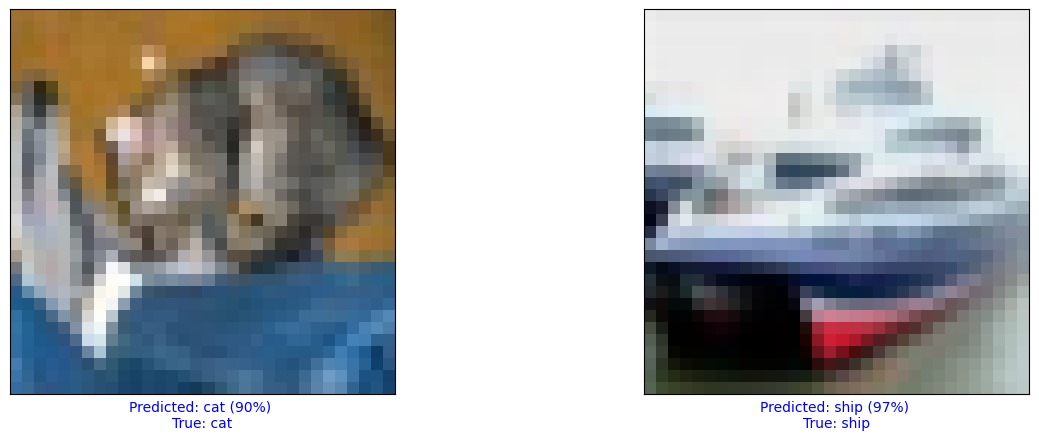

In [22]:
display_images_with_labels(test_images_normalized[:2], test_labels[:2].flatten(), predicted_labels[:2], class_names, predictions[:2])

Predict a single image from the test set

In [23]:
single_image = test_images_normalized[5]

# Add a batch dimension using np.expand_dims to not encounter shape mismatch error
single_image_with_batch = np.expand_dims(single_image, axis=0)

# Make a prediction on the single image
prediction = model.predict(single_image_with_batch)

# We can use prediction to access the probabilities for each class
print(prediction)

1/1 [==============================] - 0s 23ms/step
[[6.2103639e-04 3.9709671e-04 1.9064091e-02 4.1057181e-02 2.6924666e-02
  2.8568400e-02 8.8099045e-01 1.9687964e-03 1.4365344e-04 2.6469855e-04]]


**A more complex model architecture**

Let's add Data Augmentation to increase the diversity of the training dataset

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Fit the generator to your data
datagen.fit(train_images_normalized)

Let's add convolutional neural networks (CNNs) to improve the model's architecture

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.6), # Dropout with a 60% probability to reduce overfitting
    Dense(10, activation='softmax')
])

Let's add Learning rate scheduling

In [17]:
from keras.optimizers import Adam

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule)

Let's compile the model

In [17]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy', # used for multiclass classification
                metrics=['accuracy'])

Let's train the model with augmented data

In [ ]:
model.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),  # Generate augmented batches
    epochs=10,  # Number of epochs for training
    validation_data=(test_images, test_labels),  # Validation dataset against which the model's performance is evaluated
    callbacks=[keras.callbacks.EarlyStopping(patience=5)] # Monitor the validation loss. Without improvement after 5 consecutive epochs, training will stop early to prevent overfitting.
)